**Import necessary libraries**

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [86]:
df=pd.read_excel('/content/Telangana_DTH_MultiProvider_Analytics.xlsx')
df.head()

,Provider,Month,District,Mandal,Package_Type,New_Connections,Renewals,Complaints,Cancellations,Revenue,SetupBox_Interest,Sales_Category
0,VillageCable,Jan 2025,Jangaon,Ghanpur (Stn),Combo,50,47,3,2,29100,High,low
1,VillageCable,Jan 2025,Jangaon,Ragunathpally,HD,11,43,5,1,16200,Low,Medium
2,VillageCable,Jan 2025,Jangaon,Palakurthy,Gold,25,12,3,0,14800,Low,Low
3,VillageCable,Jan 2025,Jangaon,Zaffergadh,Combo,63,39,0,3,30600,High,High
4,VillageCable,Jan 2025,Warangal,Hanamkonda,Kids,14,30,4,2,22000,Low,Medium


In [105]:
#Total customers = new + renewed
df['Total_Customers']=df['New_Connections']+df['Renewals']

In [106]:
#Churn Rate = cancellations / total customers
df['Churn_Rate']=df['Cancellations']/df['Total_Customers']

In [107]:
#Complaint Rate = complaints / total customers
df["Complaint_Rate"] = df["Complaints"] / df["Total_Customers"]

In [109]:
#Revenue per customer
df["Revenue_per_Customer"] = df["Revenue"] / df["Total_Customers"]

In [110]:
#Aggregate KPIs (Key Performance Indicators) by Provider
kpis = df.groupby("Provider")[["Revenue_per_Customer", "Churn_Rate", "Complaint_Rate"]].mean().round(2)

In [111]:
#Calculate Market Share by Provider (as % of total records)
market_share = df["Provider"].value_counts(normalize=True).mul(100).round(2)

In [112]:
#Visualize KPIs and Market Share in a 2x2 grid layout
plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2)


<Figure size 1200x800 with 0 Axes>

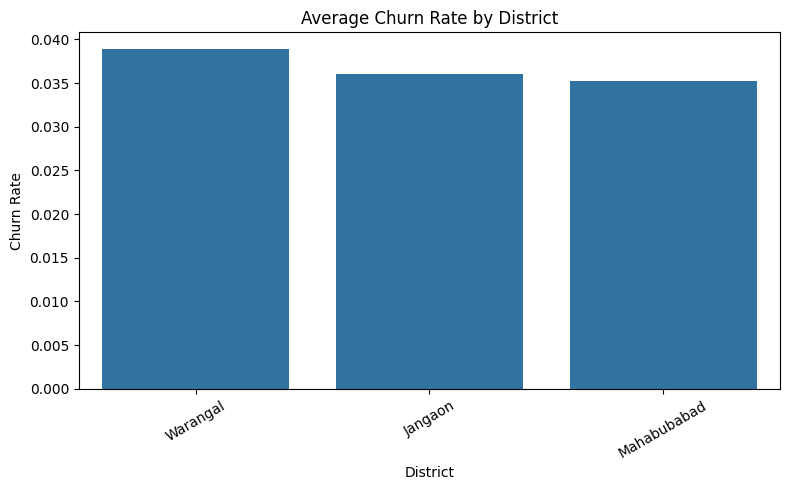

In [113]:
#Avg Churn Rate by District

plt.figure(figsize=(8, 5))
churn_by_district = df.groupby("District")["Churn_Rate"].mean().sort_values(ascending=False)
sns.barplot(x=churn_by_district.index, y=churn_by_district.values)
plt.title("Average Churn Rate by District")
plt.ylabel("Churn Rate")
plt.xlabel("District")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#Warangal has the highest number of customers leaving, which could mean they are unhappy or choosing other companies. We should focus on keeping these customers.
---



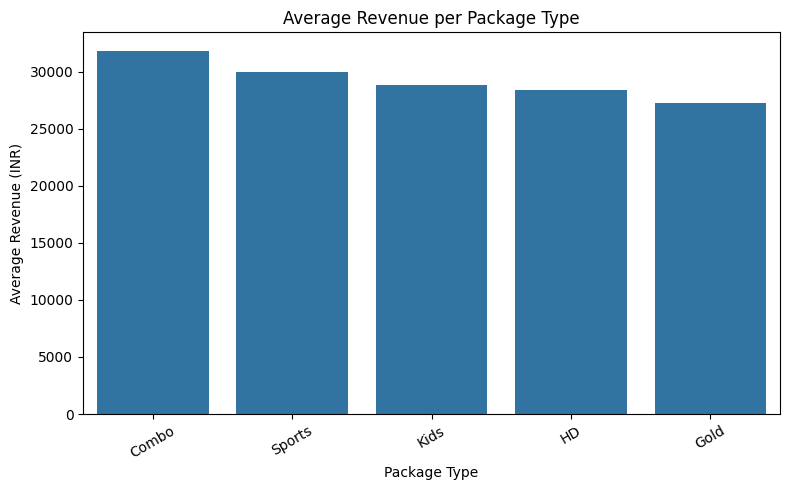

In [114]:
#Average Revenue per Package Type

plt.figure(figsize=(8, 5))
avg_rev_pkg = df.groupby("Package_Type")["Revenue"].mean().sort_values(ascending=False)
sns.barplot(x=avg_rev_pkg.index, y=avg_rev_pkg.values)
plt.title("Average Revenue per Package Type")
plt.xlabel("Package Type")
plt.ylabel("Average Revenue (INR)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#Combo and Sports packages bring in the most money. These are popular and should be promoted more.

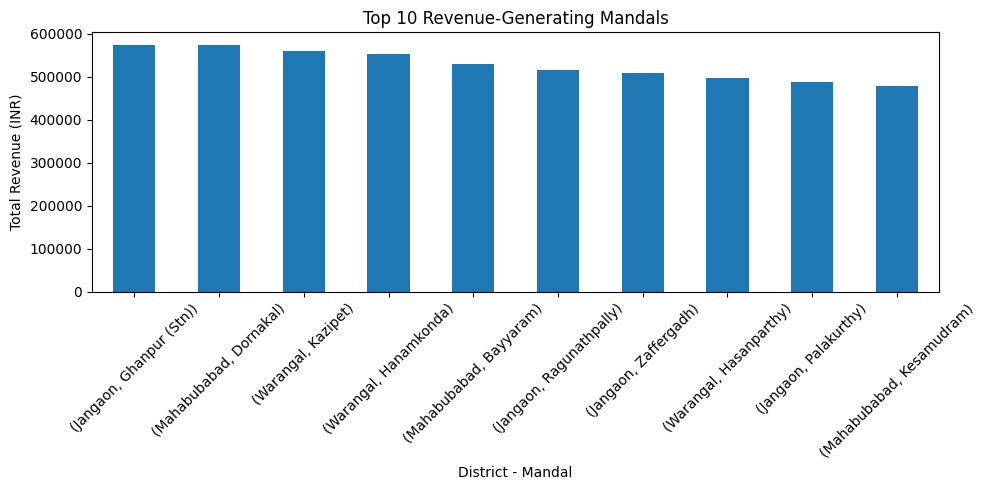

In [115]:
#Top 10 Revenue-Generating Mandals

plt.figure(figsize=(10, 5))
top_mandals = df.groupby(["District", "Mandal"])["Revenue"].sum().sort_values(ascending=False).head(10)
top_mandals.plot(kind='bar')
plt.title("Top 10 Revenue-Generating Mandals")
plt.xlabel("District - Mandal")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Most of the money comes from areas in Jangaon, Mahabubabad, and Warangal. These are strong markets to focus on.

Text(0, 0.5, 'INR')

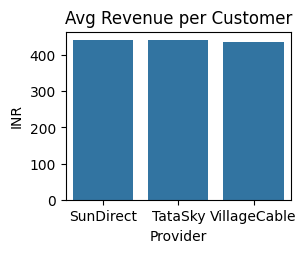

In [116]:
#Revenue per Customer by Provider

ax0 = plt.subplot(gs[0, 0])
sns.barplot(x=kpis.index, y="Revenue_per_Customer", data=kpis, ax=ax0)
ax0.set_title("Avg Revenue per Customer")
ax0.set_ylabel("INR")

# All three providers make around the same money per customer. No big difference here.

Text(0, 0.5, 'Rate')

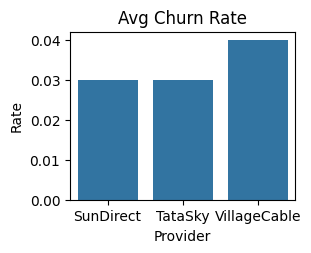

In [117]:
#Churn Rate by Provider

ax1 = plt.subplot(gs[0, 1])
sns.barplot(x=kpis.index, y="Churn_Rate", data=kpis, ax=ax1)
ax1.set_title("Avg Churn Rate")
ax1.set_ylabel("Rate")

# VillageCable is losing more customers than others. They need to improve service or offers.

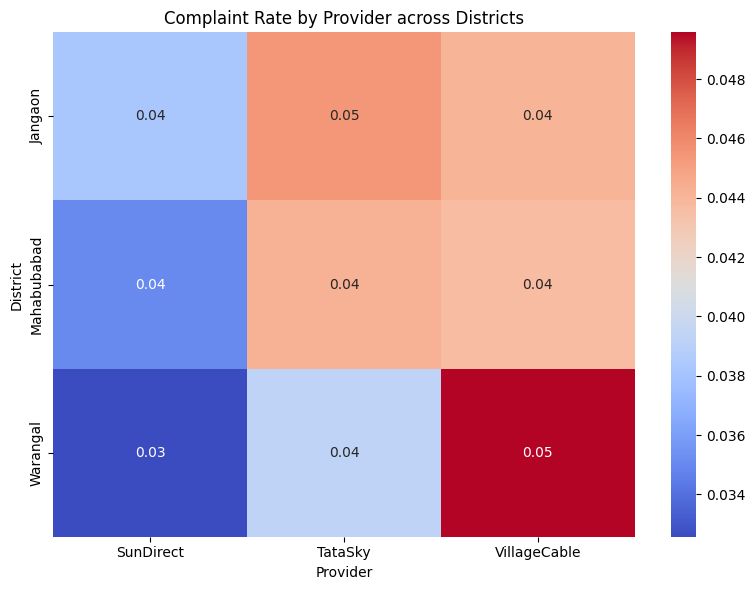

In [118]:
#Complaint Rate by Provider and District (Heatmap)

complaints = df.groupby(["District", "Provider"])["Complaint_Rate"].mean().unstack().fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(complaints, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Complaint Rate by Provider across Districts")
plt.xlabel("Provider")
plt.ylabel("District")
plt.tight_layout()
plt.show()

# More complaints are seen with VillageCable, especially in Warangal. They should fix problems in those areas.

# VillageCable again has the highest complaints. This means service needs improvement.

Text(0.5, 1.0, 'Market Share by Provider')

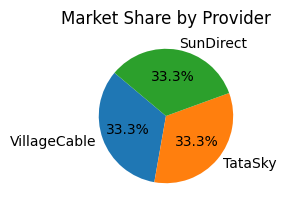

In [120]:
#Market Share by Provider

ax3 = plt.subplot(gs[1, 1])
ax3.pie(market_share.values, labels=market_share.index, autopct='%1.1f%%', startangle=140)
ax3.set_title("Market Share by Provider")

# All providers have the same size in the market. To grow, each one needs to offer something better or different.

In [121]:
#Display KPIs and Potential Zones for Interview Talking Points

print("📌 KPIs Summary by Provider:\n", kpis, "\n")

📌 KPIs Summary by Provider:
               Revenue_per_Customer  Churn_Rate  Complaint_Rate
Provider                                                      
SunDirect                   442.50        0.03            0.04
TataSky                     441.67        0.03            0.04
VillageCable                437.50        0.04            0.05 



<ipython-input-104-354c1363bdcd>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kpis.index, y=kpis["Overall_Score"], palette="viridis")


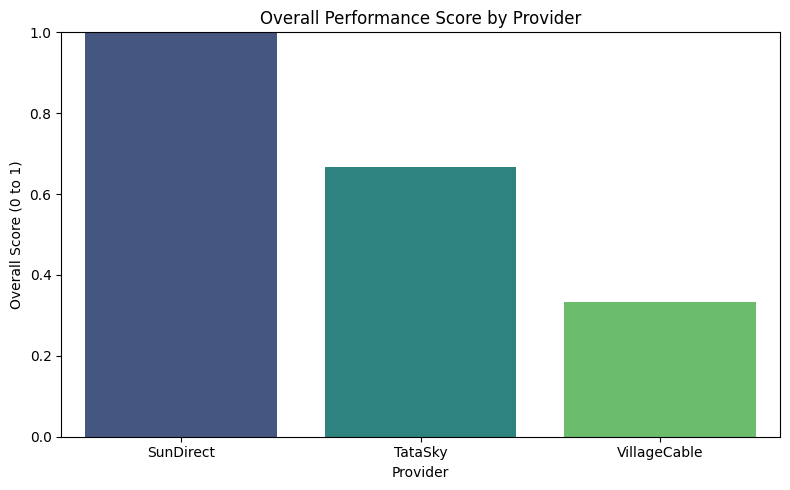

In [104]:

kpis = df.groupby("Provider")[["Revenue_per_Customer", "Churn_Rate", "Complaint_Rate"]].mean()


kpis["Churn_Score"] = 1 - kpis["Churn_Rate"]
kpis["Complaint_Score"] = 1 - kpis["Complaint_Rate"]


kpis["Revenue_Score"] = kpis["Revenue_per_Customer"].rank(pct=True)
kpis["Churn_Score"] = kpis["Churn_Score"].rank(pct=True)
kpis["Complaint_Score"] = kpis["Complaint_Score"].rank(pct=True)


kpis["Overall_Score"] = (kpis["Revenue_Score"] + kpis["Churn_Score"] + kpis["Complaint_Score"]) / 3


plt.figure(figsize=(8, 5))
sns.barplot(x=kpis.index, y=kpis["Overall_Score"], palette="viridis")
plt.title("Overall Performance Score by Provider")
plt.ylabel("Overall Score (0 to 1)")
plt.xlabel("Provider")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# SunDirect leads with the highest overall performance score, indicating strong revenue generation, low churn, and fewer complaints. TataSky performs moderately well but has room to improve, while VillageCable scores the lowest, showing weak performance across key areas. Strategic improvements in service quality and retention are crucial for VillageCable.